<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/SKIM_LIT_NPL/blob/main/skim_literature_positional_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

DATA_SOURCE: https://github.com/Franck-Dernoncourt/pubmed-rct.git

In [1]:
# defining the function to read the lines of a docuents:

def get_lines(filenames):
    with open(filenames, "r") as f:
        return f.readlines()


In [3]:
# setting path and readind the txt files:
train_path = "/content/train.txt"
test_path = "/content/test.txt"
dev_path = "/content/dev.txt"
train_lines = get_lines(train_path)
train_lines[:20]

['###24491034\n',
 'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n',
 'BACKGROUND\tThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\n',
 'METHODS\tThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\n',
 "METHODS\tThe intervention group will participate in the online group program ` Positive Outlook ' .\n",
 'METHODS\tThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\n',
 'METHODS\tParticipants will access the program f

In [4]:
class PreprocessTextWithLineNumbers:
    def __init__(self, path):
        self.path = path

    def path_fetch_and_separation(self):
        try:
            abstract_samples = []
            abstract_lines = ""
            input_lines =  get_lines(self.path)

            # Loop through each line in target file
            for line in input_lines:
                if line.startswith("###"):
                    abstract_id = line
                    abstract_lines = ""
                elif line.isspace():
                    abstract_line_split = abstract_lines.splitlines()

                    # Iterate through each line in abstract and count them at the same time
                    for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                        line_data = {}
                        target_text_split = abstract_line.split("\t")
                        line_data["target"] = target_text_split[0]
                        line_data["text"] = target_text_split[1].lower()
                        line_data["line_number"] = abstract_line_number
                        line_data["total_lines"] = len(abstract_line_split) - 1
                        abstract_samples.append(line_data)
                else:
                    abstract_lines += line

            return abstract_samples

        except Exception as e:
            print(f"An unexpected error occurred: {e}")

def process_text(path):
    pt = PreprocessTextWithLineNumbers(path)
    return pt.path_fetch_and_separation()



In [5]:
# Get data from file and preprocess it
%%time
train_samples = process_text(train_path)
val_samples = process_text(dev_path)
test_samples = process_text(test_path)

len(train_samples), len(val_samples), len(test_samples)

CPU times: user 54.5 ms, sys: 3.78 ms, total: 58.3 ms
Wall time: 59.9 ms


(6574, 6528, 6573)

In [6]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(10)

,target,text,line_number,total_lines
0,BACKGROUND,the emergence of hiv as a chronic condition me...,0,10
1,BACKGROUND,this paper describes the design and evaluation...,1,10
2,METHODS,this study is designed as a randomised control...,2,10
3,METHODS,the intervention group will participate in the...,3,10
4,METHODS,the program is based on self-efficacy theory a...,4,10
5,METHODS,participants will access the program for a min...,5,10
6,METHODS,primary outcomes are domain specific self-effi...,6,10
7,METHODS,"secondary outcomes include : depression , anxi...",7,10
8,METHODS,"data collection will take place at baseline , ...",8,10
9,CONCLUSIONS,results of the positive outlook study will pro...,9,10


In [7]:
# Distribution of labels in training data
train_df.target.value_counts()

RESULTS        2278
METHODS        2173
CONCLUSIONS    1023
BACKGROUND      581
OBJECTIVE       519
Name: target, dtype: int64

In [8]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output = False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [9]:
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(6574, 6528, 6573)

<Axes: ylabel='Frequency'>

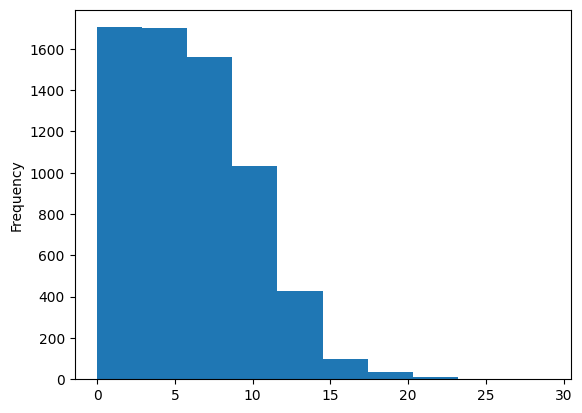

In [10]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()

In [11]:
import tensorflow as tf
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [12]:
train_line_numbers_one_hot

<tf.Tensor: shape=(6574, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [13]:

# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot

(TensorShape([6574, 20]),
 <tf.Tensor: shape=(6574, 20), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

In [14]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [15]:
# Make function to split sentences into characters
import random

def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(random.choice(train_sentences))


't h e s e   r e s u l t s   s u g g e s t   t h a t   b l   i s   m o r e   l i k e l y   t h a n   e i t h e r   f @ f l   o r   e l   a l o n e   ,   t o   b e   b o t h   e f f e c t i v e   a n d   a c c e p t e d   w h e n   d e l i v e r i n g   c e p h a l o m e t r i c   e d u c a t i o n   t o   u n d e r g r a d u a t e s   .'

In [16]:
# Split sequence-level data splits into character-level data splits function

def split_char(data):
    s_chars= []
    for i in data:
        s_chars.append(split_chars(i))
    return s_chars


In [17]:
train_chars =  split_char(train_sentences)
val_chars = split_char(val_sentences)
test_chars = split_char(test_sentences)
print(train_chars[0])

t h e   e m e r g e n c e   o f   h i v   a s   a   c h r o n i c   c o n d i t i o n   m e a n s   t h a t   p e o p l e   l i v i n g   w i t h   h i v   a r e   r e q u i r e d   t o   t a k e   m o r e   r e s p o n s i b i l i t y   f o r   t h e   s e l f - m a n a g e m e n t   o f   t h e i r   c o n d i t i o n   ,   i n c l u d i n g   m a k i n g   p h y s i c a l   ,   e m o t i o n a l   a n d   s o c i a l   a d j u s t m e n t s   .


In [18]:
# What's the average character length?
import numpy as np
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

148.17417097657437

In [19]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

287

In [20]:
import string

alphabet = string.punctuation + string.ascii_lowercase + string.digits

# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + 2(ie. space + OOV token)


char_vectorizer = tf.keras.layers.TextVectorization(  max_tokens= NUM_CHAR_TOKENS,
                                                      standardize='lower_and_strip_punctuation',
                                                      output_sequence_length = output_seq_char_len,
                                                      name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)


In [21]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")




# Create char embedding layer
char_embed = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
rand = random.choice(train_chars)
print(f"Charified text (before vectorization and embedding):\n{rand}\n")
char_embed_example = char_embed(char_vectorizer(rand))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Number of different characters in character vocab: 28
Charified text (before vectorization and embedding):
e v e n   w i t h   t h e   u s e   o f   a d j u n c t i v e   p r o c e d u r e s   ,   m o s t   p a t i e n t s   s t i l l   r e q u i r e   o p e n   r e p a i r   .

Embedded chars (after vectorization and embedding):
[[-0.0127432  -0.02283221  0.03018712 ... -0.00471229 -0.00860909
  -0.01451706]
 [ 0.01458368 -0.02919719  0.03454621 ...  0.01655538 -0.01243874
  -0.02836337]
 [-0.0127432  -0.02283221  0.03018712 ... -0.00471229 -0.00860909
  -0.01451706]
 ...
 [-0.01977283  0.02033757  0.02494696 ...  0.03282224 -0.04652428
   0.01469379]
 [-0.01977283  0.02033757  0.02494696 ...  0.03282224 -0.04652428
   0.01469379]
 [-0.01977283  0.02033757  0.02494696 ...  0.03282224 -0.04652428
   0.01469379]]

Character embedding shape: (287, 25)


In [67]:
# 1. Token inputs
import tensorflow as tf

token_inputs = tf.keras.layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_outputs)


# 2. Char inputs
char_inputs = tf.keras.layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(char_embeddings)
x = tf.keras.layers.Dense(128, activation="relu")(char_bi_lstm)
char_model = tf.keras.Model(inputs=char_inputs, outputs=x)


# 3. Line numbers inputs
line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = tf.keras.layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs, outputs=x)


# 4. Total lines inputs
total_lines_inputs = tf.keras.layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = tf.keras.layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs, outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = tf.keras.layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, char_model.output])
x = tf.keras.layers.Dense(256, activation="relu")(combined_embeddings)
x = tf.keras.layers.Dropout(0.5)(x)


# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
x = tf.keras.layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output, total_line_model.output,x])

# 7. Create output layer
output_layer = tf.keras.layers.Dense(5, activation="softmax", name="output_layer")(x)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)



In [68]:
# Get a summary of our token, char and positional embedding model
model_5.summary()

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 287)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_embed (Embedding)      (None, 287, 25)              1750      ['char_vectorizer[5][0]

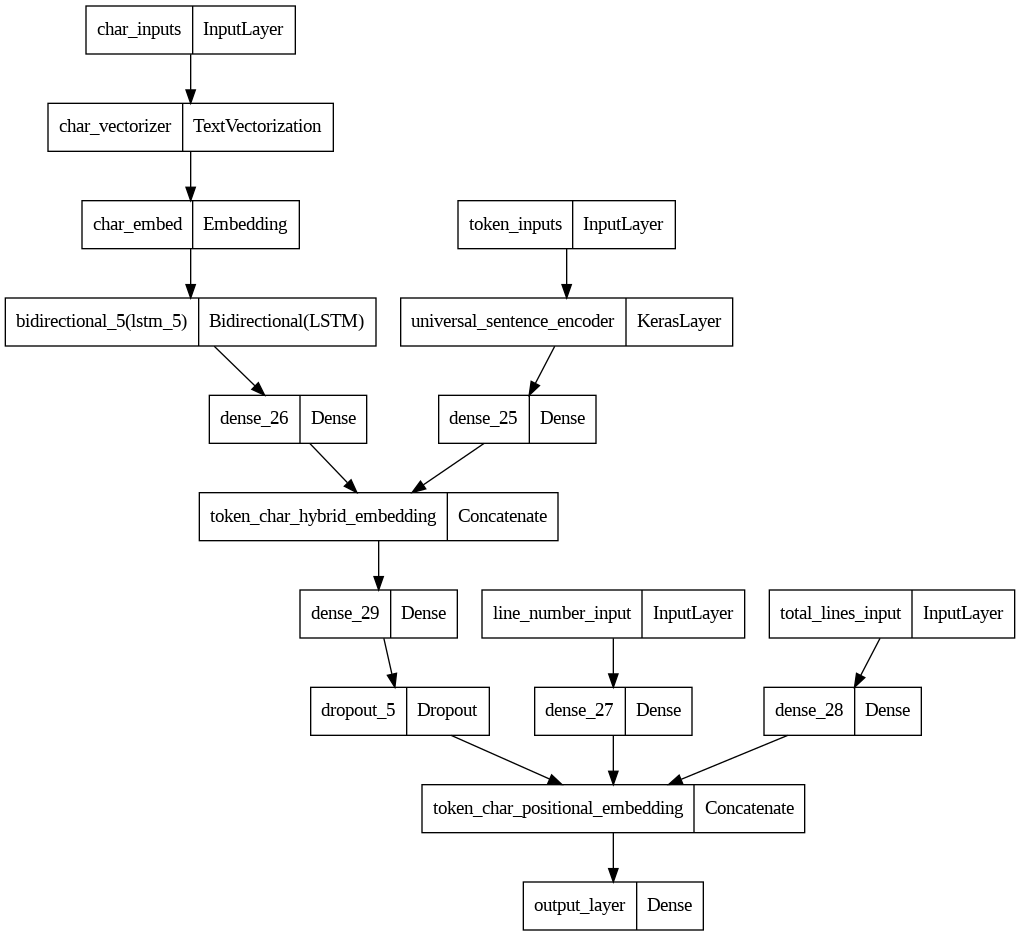

In [69]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [70]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f4caf4e6920> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f4cc2486e90> True
<keras.src.engine.input_layer.InputLayer object at 0x7f4caf23dbd0> True
<keras.src.layers.core.embedding.Embedding object at 0x7f4d92116c20> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f4d3ed9a950> False
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7f4caca9dff0> True
<keras.src.layers.core.dense.Dense object at 0x7f4c928806a0> True
<keras.src.layers.core.dense.Dense object at 0x7f4caf0e4fd0> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7f4cac511c60> True
<keras.src.engine.input_layer.InputLayer object at 0x7f4cac73b2b0> True
<keras.src.engine.input_layer.InputLayer object at 0x7f4c92b453c0> True
<keras.src.layers.core.dense.Dense object at 0x7f4cac4a7af0> True
<keras.src.layers.core.dense.Dense object at 0x7f4cacbef850> True
<keras.src.layers.core.dense.Dense object

In [71]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

**Create tribrid embedding datasets and fit tribrid model**

In [72]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))

train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [73]:
# Fit the token, char and positional embedding model
early_stop = tf.keras.callbacks.EarlyStopping(
                                                    monitor='val_accuracy',
                                                    patience=3,
                                                    restore_best_weights=True
                                                )

history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=len(train_pos_char_token_dataset),
                              epochs=20,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps= len(val_pos_char_token_dataset),
                              callbacks = [early_stop])

Epoch 1/20
206/206 [==============================] - 22s 74ms/step - loss: 1.1979 - accuracy: 0.6430 - val_loss: 1.0391 - val_accuracy: 0.7560
Epoch 2/20
206/206 [==============================] - 13s 62ms/step - loss: 0.9985 - accuracy: 0.7922 - val_loss: 0.9828 - val_accuracy: 0.7934
Epoch 3/20
206/206 [==============================] - 14s 70ms/step - loss: 0.9436 - accuracy: 0.8319 - val_loss: 0.9700 - val_accuracy: 0.8045
Epoch 4/20
206/206 [==============================] - 11s 54ms/step - loss: 0.9152 - accuracy: 0.8553 - val_loss: 0.9635 - val_accuracy: 0.8111
Epoch 5/20
206/206 [==============================] - 13s 61ms/step - loss: 0.8899 - accuracy: 0.8728 - val_loss: 0.9624 - val_accuracy: 0.8123
Epoch 6/20
206/206 [==============================] - 18s 86ms/step - loss: 0.8664 - accuracy: 0.8940 - val_loss: 0.9625 - val_accuracy: 0.8136
Epoch 7/20
206/206 [==============================] - 13s 62ms/step - loss: 0.8433 - accuracy: 0.9124 - val_loss: 0.9695 - val_accuracy:

In [74]:

# Make predictions with token-char-positional hybrid model
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs


204/204 [==============================] - 15s 16ms/step


array([[0.37032557, 0.0449014 , 0.1181605 , 0.4025487 , 0.06406379],
       [0.14484358, 0.02765794, 0.658823  , 0.12133533, 0.04734021],
       [0.18387279, 0.04713642, 0.36174127, 0.11171488, 0.29553467],
       ...,
       [0.03383724, 0.08617663, 0.02262766, 0.03509647, 0.822262  ],
       [0.0314454 , 0.43519372, 0.02599019, 0.04381216, 0.46355858],
       [0.05084337, 0.29905072, 0.04159364, 0.04795856, 0.5605537 ]],
      dtype=float32)

In [75]:

# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(6528,), dtype=int64, numpy=array([3, 2, 2, ..., 4, 4, 4])>

In [76]:

# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([0, 0, 2, ..., 4, 1, 1])

In [77]:
# Get class names and number of classes from LabelEncoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [78]:

# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results


{'accuracy': 81.35723039215686,
 'precision': 0.8113411290123148,
 'recall': 0.8135723039215687,
 'f1': 0.8120671401437253}

In [82]:
model_5.save("/content/drive/MyDrive/colab_model/skimlit_tribrid_model", save_format='tf')

---
---
---
# Testing Model:

In [95]:
import json
with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [96]:
# See what our example abstracts look like
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [100]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Old version of spaCy
# sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
# nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])
doc

This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.

In [103]:

abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [104]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
    sample_dict = {}
    sample_dict["text"] = str(line)
    sample_dict["line_number"] = i
    sample_dict["total_lines"] = total_lines_in_sample - 1
    sample_lines.append(sample_dict)

sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [105]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [106]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [139]:
# Make function to split sentences into characters
import random
class split_text:
    def __init__(self,data):
        self.data = data

    def split_chars(text):
        return " ".join(list(text))

    def split_char(self):
        s_chars= []
        for i in self.data:
            s_chars.append(split_chars(i))
        return s_chars

def split_abstract(data):
    return split_text(data).split_char()


In [141]:
abstract_chars = split_abstract(abstract_lines)
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [142]:
# Load the model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/colab_model/skimlit_tribrid_model")


In [143]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 1s 1s/step
CPU times: user 1.41 s, sys: 16.6 ms, total: 1.43 s
Wall time: 1.41 s


array([[0.32389095, 0.08573357, 0.06266037, 0.4859154 , 0.04179976],
       [0.05413695, 0.01812678, 0.8469232 , 0.05811331, 0.02269979],
       [0.09450254, 0.02627696, 0.6290525 , 0.12999265, 0.12017528],
       [0.05515735, 0.07926521, 0.7066068 , 0.06633441, 0.09263621],
       [0.03349483, 0.0920608 , 0.57065576, 0.03796946, 0.26581916],
       [0.03115208, 0.07205207, 0.55248743, 0.03099716, 0.31331125],
       [0.06407897, 0.20621987, 0.21682298, 0.02664799, 0.48623016],
       [0.01755296, 0.11125755, 0.26199257, 0.03829905, 0.5708979 ]],
      dtype=float32)

In [146]:

# Turn prediction probabilities into prediction classes
preds = tf.argmax(test_abstract_pred_probs, axis=1)

preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 2, 2, 4, 4])>

In [147]:
lit = ['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']

In [149]:
for i in range(len(preds)):
    print(abstract_lines[i])
    prediction = preds[i]
    print(lit[prediction])

This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
OBJECTIVE
Participants were randomly assigned to treatment or wait-list conditions.
METHODS
Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS
A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS
Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS
Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
METHODS
High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS
Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
RESULTS
